In [1]:
pip install opencv-python-headless matplotlib numpy


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.2/38.8 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.5/38.8 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.8 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.8 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.6/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.7/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.7/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.7/38.8 MB 1.7 MB/s eta 0:00:23
    -------

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [12]:
def read_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")  # Hide axes for cleaner visualization
    plt.show()
    return image


In [13]:
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()
    return gray_image


In [14]:
def normalize_image(image, width=150, height=140):
    normalized_image = cv2.resize(image, (width, height))
    plt.imshow(normalized_image, cmap='gray')
    plt.title("Normalized Image")
    plt.axis("off")
    plt.show()
    return normalized_image


In [15]:
def reduce_noise(image):
    denoised_image = cv2.medianBlur(image, 5)  # Apply 5x5 median filter
    plt.imshow(denoised_image, cmap='gray')
    plt.title("Noise Reduced Image")
    plt.axis("off")
    plt.show()
    return denoised_image


In [16]:
def convert_to_binary(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image")
    plt.axis("off")
    plt.show()
    return binary_image


In [17]:
def remove_unwanted_portions(image):
    # Assuming unwanted portions are black borders or small artifacts
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)  # Find the largest contour
    mask = np.zeros_like(image)  # Create a blank mask
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)  # Fill the largest contour
    cleaned_image = cv2.bitwise_and(image, image, mask=mask)  # Apply mask
    plt.imshow(cleaned_image, cmap='gray')
    plt.title("Cleaned Image")
    plt.axis("off")
    plt.show()
    return cleaned_image


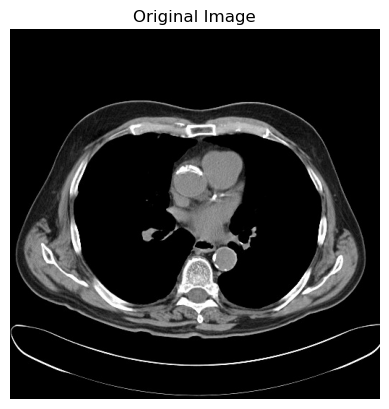

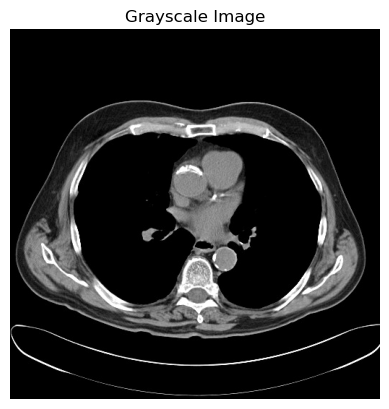

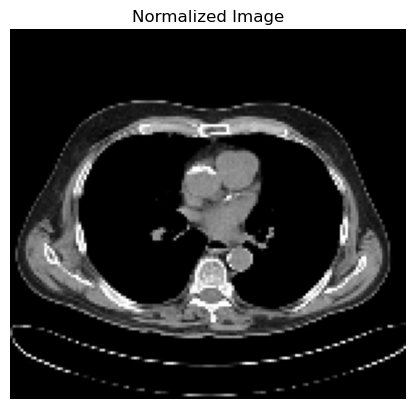

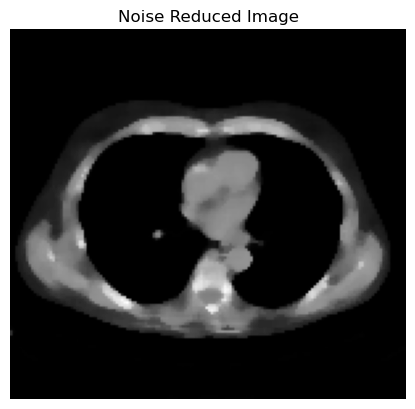

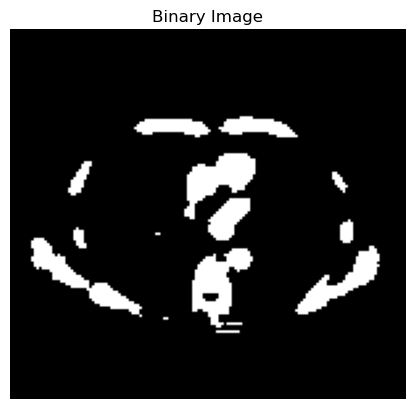

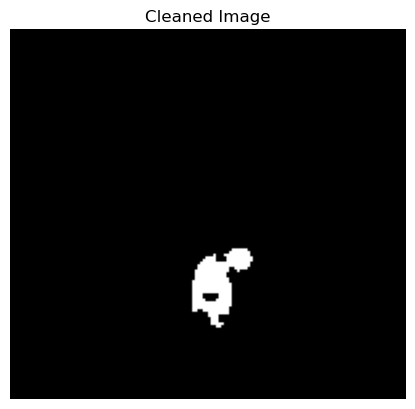

In [20]:
# Replace 'images/lung_image.jpg' with your actual image path
image_path = 'Cancerous25.jpg'

# Step-by-step preprocessing
original_image = read_image(image_path)
gray_image = convert_to_grayscale(original_image)
normalized_image = normalize_image(gray_image)
noise_reduced_image = reduce_noise(normalized_image)
binary_image = convert_to_binary(noise_reduced_image)
final_image = remove_unwanted_portions(binary_image)


# Edge Filtering:Roberts

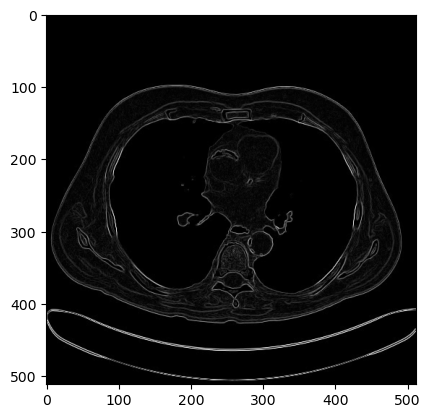

In [21]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np


img = cv2.imread('Cancerous25.jpg', 0)
# plt.imshow(img)


#Edge detection
from skimage.filters import roberts, sobel, scharr, prewitt, farid

roberts_img = roberts(img)
plt.imshow(roberts_img,cmap='gray')

# Edge Filtering:Canny

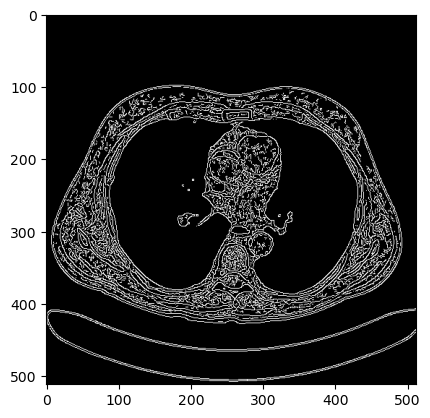

In [27]:
#Canny
canny_edge = cv2.Canny(img,50,80)

#Autocanny
sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median)) # lower of double threshold
upper = int(min(255, (1.0 + sigma) * median))  # upper of double threshold
auto_canny = cv2.Canny(img, lower, upper)

plt.imshow(canny_edge,cmap='gray')

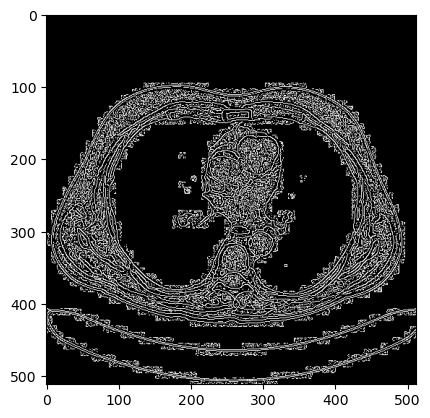

In [28]:
plt.imshow(auto_canny,cmap='gray')

(512, 512)


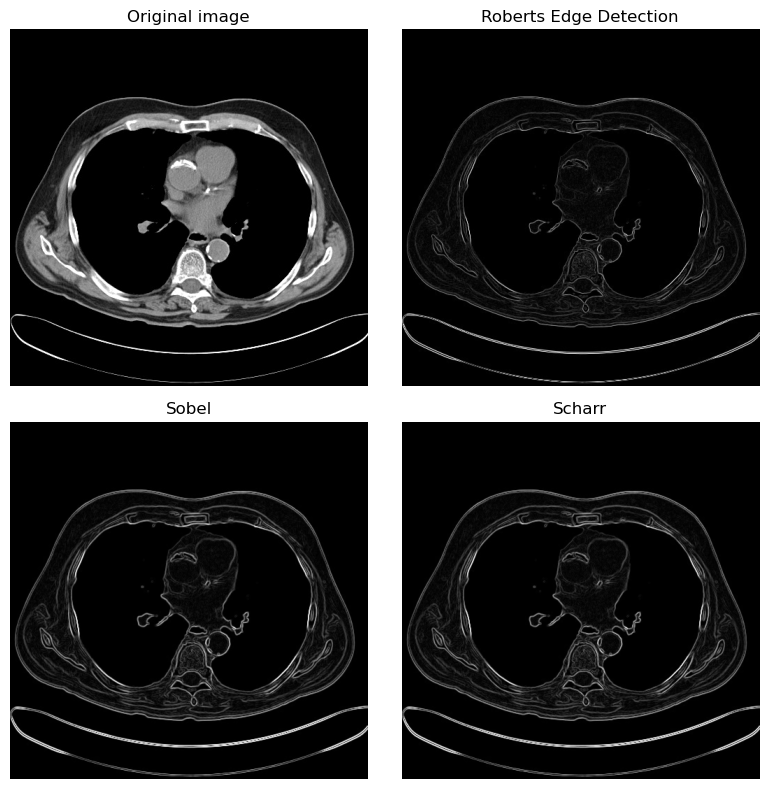

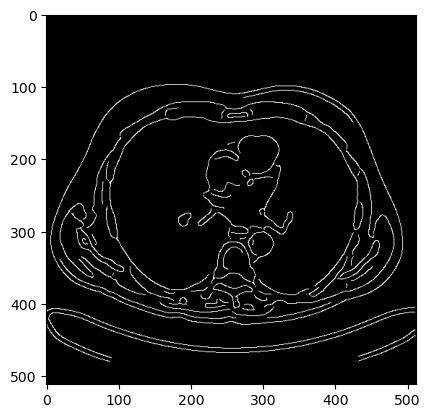

In [31]:
# Edge Detection


import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("Cancerous25.jpg", as_gray=True)  #Convert to grey scale
print(img.shape)
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
#plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny,cmap='gray')